##### APPLIED DATA SCIENCE project
##### This notebook is dedicated to my capstone project.

In [80]:
# importing the necessary libraries
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None) # allows the dataframe to be displayed in its entirty accross all columns 
pd.set_option('display.max_rows', None) # allows the dataframe to be displayed in its entirty accross all rows 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
!pip install matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
 
# import k-means from clustering stage
!pip install sklearn
from sklearn.cluster import KMeans

In [81]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [82]:
wikipedia_url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
dfs =  pd.read_html(wikipedia_url)
print(len(dfs))

toronto_neighbourhood = dfs[0]

3


In [83]:
toronto_neighbourhood.shape

(180, 3)

### GRAB THE LAT AND LONG OF NEIGHBOORHOODS

In [84]:
# get names of indexes for which 
# column Borough has Not assigned
index_names = toronto_neighbourhood[toronto_neighbourhood['Borough'] == 'Not assigned' ].index 

# droping every entry in the Borough column that has 'Not assigned' as entry
toronto_neighbourhood.drop(index_names, inplace = True)   
toronto_neighbourhood.shape

(103, 3)

In [85]:
# lET'S RESET THE INDEX OF OUR DATARFRAME
toronto_neighbourhood = toronto_neighbourhood.reset_index(drop=True)
toronto_neighbourhood

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [86]:
# import the geocoder library to find the lat and lng of the postal codes
!pip install geocoder
!pip install pgeocode
import geocoder
import pgeocode

In [87]:
nomi = pgeocode.Nominatim('ca') # intializing the country to canada
lat_lng = []
code_lat_lng = []
lat = None
lng = None

# postal_codes should contain a list of the codes after this loop
for column in toronto_neighbourhood[['Postal Code']]:
    postal_codes = toronto_neighbourhood[column].values

#extracting lat and lng for all postal codes    
for code in postal_codes:
    #let's loop until we find both lat and lng incase we encounter None
    while((lat == None) or (lng == None)):
        df_lat_long = nomi.query_postal_code(code) # grabs the lat and lng for a postal code
        lat = df_lat_long['latitude']
        lng = df_lat_long['longitude']
    
#     print("Done with {}, Toronto, Ontario".format(code))
    lat_lng.append([lat, lng])
    code_lat_lng.append([code, lat, lng])
    lat = None
    lng = None

# lat_lng
code_lat_lng

[['M3A', 43.7545, -79.33],
 ['M4A', 43.7276, -79.3148],
 ['M5A', 43.6555, -79.3626],
 ['M6A', 43.7223, -79.4504],
 ['M7A', 43.6641, -79.3889],
 ['M9A', 43.6662, -79.5282],
 ['M1B', 43.8113, -79.193],
 ['M3B', 43.745, -79.359],
 ['M4B', 43.7063, -79.3094],
 ['M5B', 43.6572, -79.3783],
 ['M6B', 43.7081, -79.4479],
 ['M9B', 43.6505, -79.5517],
 ['M1C', 43.7878, -79.1564],
 ['M3C', 43.7334, -79.3329],
 ['M4C', 43.6913, -79.3116],
 ['M5C', 43.6513, -79.3756],
 ['M6C', 43.6915, -79.4307],
 ['M9C', 43.6437, -79.5767],
 ['M1E', 43.7678, -79.1866],
 ['M4E', 43.6784, -79.2941],
 ['M5E', 43.6456, -79.3754],
 ['M6E', 43.6889, -79.4507],
 ['M1G', 43.7712, -79.2144],
 ['M4G', 43.7124, -79.3644],
 ['M5G', 43.6564, -79.38600000000002],
 ['M6G', 43.6683, -79.4205],
 ['M1H', 43.7686, -79.2389],
 ['M2H', 43.8015, -79.3577],
 ['M3H', 43.7535, -79.4472],
 ['M4H', 43.7059, -79.3464],
 ['M5H', 43.6496, -79.3833],
 ['M6H', 43.6655, -79.4378],
 ['M1J', 43.7464, -79.2323],
 ['M2J', 43.7801, -79.3479],
 ['M3J', 

In [88]:
len(lat_lng), len(postal_codes), toronto_neighbourhood.shape
# toronto_neighborhood

(103, 103, (103, 3))

In [89]:
# Let's find out the index of the entry for the code "M7R"
# The postal code in the mississauga area is L4something and not M7R,
# so it only makes sense to get rid of this OUTLIER from our data
toronto_neighbourhood[toronto_neighbourhood['Postal Code'] == 'M7R']

,Postal Code,Borough,Neighbourhood
76,M7R,Mississauga,Canada Post Gateway Processing Centre


In [90]:
toronto_neighbourhood = toronto_neighbourhood.drop([76])

In [91]:
# Now we can the drop the nan values from out lat and long before adding to 
# our dataframe
del lat_lng[76]

In [92]:
# making sure we have consistency with dataframe and lat_lng list
len(lat_lng), toronto_neighbourhood.shape

(102, (102, 3))

In [245]:
Latitude = []
Longitude = []
for i in range(len(lat_lng)):
    Latitude.append(lat_lng[i][0])
    Longitude.append(lat_lng[i][1])

len(Latitude), len(Longitude), len(lat_lng)

# Add Longitude and Latitude lits as columns into the dataframe
toronto_neighbourhood = toronto_neighbourhood.assign(**{'Latitude' : Latitude, 'Longitude' : Longitude})
toronto_neighbourhood.head(20)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.7545,-79.3300
1,M4A,North York,Victoria Village,43.7276,-79.3148
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7223,-79.4504
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6641,-79.3889
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.6662,-79.5282
6,M1B,Scarborough,"Malvern, Rouge",43.8113,-79.1930
7,M3B,North York,Don Mills,43.7450,-79.3590
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.7063,-79.3094
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.6572,-79.3783


##### AT THIS POINT, WE HAVE A LOCATION ACCESSOR, AND NOW WE CAN DEAL WITH FOURSQUARE

In [94]:
!conda install -c conda-forge folium=0.5.0 --yes # THIS OR THE ONE BELOW WORKS JUST FINE
!pip install folium
import folium # map rendering library

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # THIS OR THE ONE BELOW WORKS JUST FINE


In [95]:
CLIENT_ID = "LJD2FBVQDAEH0FNBJYIX3HNTTP52HUCAAD40RMD4AYHGL3CX"
CLIENT_SECRET = "D42SDQIV2AL3EXSRJZIQCSJGYWMBVL1N0S4DUTGFF2SCGYED"

VERSION = '20180605' # Foursquare API version
LIMIT = 50 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LJD2FBVQDAEH0FNBJYIX3HNTTP52HUCAAD40RMD4AYHGL3CX
CLIENT_SECRET:D42SDQIV2AL3EXSRJZIQCSJGYWMBVL1N0S4DUTGFF2SCGYED


#### LOCATION OF INTEREST

In [96]:
LAT_OF_LISTING = 43.6564
LONG_OF_LISTING = -79.3860

In [97]:
#Starting from the common neighborhoods downtown... i.e CENTRAL BAY STREET
latitude = LAT_OF_LISTING
longitude = LONG_OF_LISTING
print('The geograpical coordinate of CENTRAL BAY STREET are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of CENTRAL BAY STREET are 43.6564, -79.386.


#### Function to display the venues around a given listing (i.e. lat and long)

In [98]:
# create map of downtown_toronto using latitude and longitude values
map_establishments = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_neighbourhood['Latitude'], toronto_neighbourhood['Longitude'], toronto_neighbourhood['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_establishments)  
    
map_establishments

##### TASKS
##### 1. MAKE FUNCTION THAT REQUESTS LOCATION ADDRESS, AND RETURNS LAT AND LONG
##### 2.
##### 3.
##### 4.
##### 5.
##### 6.
##### 7.
##### 8.
##### 9.

In [99]:
# There are nine top level categories: Arts
# & Entertainment, College & University, Food, Professional &
# Other Places, Nightlife Spot, Outdoors & Recreation, Shop
# & Service, Travel & Transport and Residence. 

In [100]:
# First, let's create the GET request URL. Name your URL url.
RADIUS = 0.1 #4 KILOMETERS
# url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&ll={},{}&v={}&raius={}&limit={}'.format(
#     CLIENT_ID, 
#     CLIENT_SECRET,  
#     latitude, 
#     longitude, 
#     VERSION,
#     RADIUS, 
#     LIMIT)

# url


url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION)  
result_json = requests.get(url).json()
result_json

{'meta': {'code': 200, 'requestId': '5fb7d1c969bc8506c4f44c3d'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

In [101]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [102]:
# lat 43.256530
# long -79.874420 HAMILTON 
# categories = json_response['response']['categories'][0]['name']
# categories
    
def get_all_categories(result):
    for cat in result['response']['categories']:
        print(cat['name'])

get_all_categories(result_json)

Arts & Entertainment
College & University
Event
Food
Nightlife Spot
Outdoors & Recreation
Professional & Other Places
Residence
Shop & Service
Travel & Transport


#### RESULT ABOVE SHOWS THERE ARE 10 CATEGORIES IN THE HIGHEST HIERARCHY 
### Under these hierarchies, we will have the sub-hierarchies for the needs of the users e.g
### LIBRARY falls under Professional & Other Places
### GYM falls under Outdoor & Recreation
### VEGAN falls under Food

## LET'S POPULATE A NEW DATAFRAME WITH THE VENUES AROUND A GIVEN LOCATION 

In [103]:
# HAMILTON FOR EXAMPLE
hamilton_lat = 43.256530
hamilton_long = -79.874420 

VERSION = '20180605' # Foursquare API version
RADIUS = 100000 #100 KILOMETER
LIMIT = 200 # A default Foursquare API limit value

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&ll={},{}&v={}&raius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET,  
    hamilton_lat, 
    hamilton_long, 
    VERSION,
    RADIUS, 
    LIMIT)
hamilton_json = requests.get(url).json()
hamilton_json

{'meta': {'code': 200, 'requestId': '5fb7d1c9a5d23e3a41dd85a9'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'suggestedRadius': 2332,
  'headerLocation': 'Central Hamilton',
  'headerFullLocation': 'Central Hamilton, Hamilton',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 132,
  'suggestedBounds': {'ne': {'lat': 43.274905041906464,
    'lng': -79.85004000328578},
   'sw': {'lat': 43.236750448754236, 'lng': -79.90320239089678}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5325f2bf498e9f92380e4fab',
       'name': 'Homewood Suites by Hilton',
       'location': {'address': '40 Bay Street South',
        'crossStreet': 'Main St W',
        'lat': 43.25713208981847,
        'l

In [104]:
# let's count the number of venues returned 
venue_list = []
venue_category = []
lat = []
count = 0
for venue in hamilton_json['response']['groups'][0]['items']:
    venue_list.append(venue['venue']['name'])
    venue_category.append(venue['venue']['categories'][0]['name'])
    lat.append(venue['venue']['location']['lat'])
    count+=1
    
# venue_list
# print(count)

In [105]:
def get_data_from_json(result):
    response = []
    for venue in result['response']['groups'][0]['items']:
        row = []
        row.append(venue['venue']['id'])
        row.append(venue['venue']['name']) #get's the name of the venue
        row.append(venue['venue']['categories'][0]['name']) # gets the category name of the venue
        row.append(venue['venue']['location']['lat']) #gets the lat of the venue
        row.append(venue['venue']['location']['lng']) #gets the lng of the venue
        response.append(row)
    
    return response

In [106]:
# ABOVE SHOWS HOW TO RETRIEVE THE LAT, NAMES OF VENUES AND CATEGORIES THAT THEY BELONG

# LET'S MAKE THE NEW DATAFRAME FOR OUT VENUES RETURNED
# X_new = pd.DataFrame(new_data, columns = ["Start_Lat", "Start_Lng", "Hour", "Pressure(in)", "Temperature(F)", "Humidity(%)"])
column_names = ["ID", "Venue_name", "Category", "Latitude", "Longitude"]
data = get_data_from_json(hamilton_json) #should contain the data from foursquare

df = pd.DataFrame(data, columns=column_names)
# len(df['Category'].unique()) #there are 67 unique categories

# df['Category'].unique()
# print(len(data)) # Number of result is 100 which is the maximum we can get
# df.shape

In [107]:
# Double check to make sure we don't have missing values in our dataframe
df.isnull().sum().sum()

0

In [109]:
#### Cause we are not getting enough data from foursquare, we'll set out requirements to the categories that have more counts 
#### e.g Pub, Restaurant, Cafe, Coffee Shop
# let's grab only the rows with category Pub, Restaurant, Cafe and Coffee Shop USING ILOC OR LOC

# df.loc[df['column_name'].isin(some_values)]
some_values = ["Pub", "Restaurant", "Pizza Place", "Coffee Shop"]
df_needs = df[df['Category'].isin(some_values)]
df_needs.reset_index(drop=True, inplace=True)
df_needs

,ID,Venue_name,Category,Latitude,Longitude
0,56151620498e131e3dcb19e7,Ark + Anchor,Coffee Shop,43.259362,-79.878163
1,4b5e5923f964a520b78a29e3,The Ship,Pub,43.252095,-79.870057
2,54cbb92b498ec28817437edb,Saint James Espresso Bar & Eatery,Coffee Shop,43.260963,-79.867135
3,4c05d3a08f8fa593837ff20d,The Winking Judge,Pub,43.252073,-79.869999
4,4b01f834f964a520e64622e3,The Pheasant Plucker,Pub,43.251970,-79.870248
5,4c6da40ea437224b65aa2db1,Earth to Table Bread Bar,Pizza Place,43.252645,-79.886943
6,528548b611d240c02b33ba2d,Two Black Sheep,Restaurant,43.251760,-79.868262
7,511d7162e4b084a5d1f26958,The George Hamilton,Restaurant,43.258324,-79.873649
8,5036724be4b001c520354587,Cafe Oranje,Coffee Shop,43.253735,-79.860022
9,52645a8911d2267fa5df22b1,The Works Gourmet Burger Bistro,Restaurant,43.257292,-79.869127


In [110]:
# now need to make api calls for each "ID" to get the ratings

# the unique categories in the dataframe
cat_list = df_needs.Category.unique()

# grab the first id in the dataframe
id = df_needs.iloc[1,0]
# print(id)

# create url for the first venue with its ID 
VERSION = '20180605' # Foursquare API version
CLIENT_ID = "LJD2FBVQDAEH0FNBJYIX3HNTTP52HUCAAD40RMD4AYHGL3CX"
CLIENT_SECRET = "D42SDQIV2AL3EXSRJZIQCSJGYWMBVL1N0S4DUTGFF2SCGYED"
venue_URL = "https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}".format(
    id, CLIENT_ID, CLIENT_SECRET, VERSION)
print(venue_URL)
print(id)

https://api.foursquare.com/v2/venues/4b5e5923f964a520b78a29e3?&client_id=LJD2FBVQDAEH0FNBJYIX3HNTTP52HUCAAD40RMD4AYHGL3CX&client_secret=D42SDQIV2AL3EXSRJZIQCSJGYWMBVL1N0S4DUTGFF2SCGYED&v=20180605
4b5e5923f964a520b78a29e3


In [111]:
# function for fetching all ratings from foursquare
VERSION = '20180605' # Foursquare API version
CLIENT_ID = "LJD2FBVQDAEH0FNBJYIX3HNTTP52HUCAAD40RMD4AYHGL3CX"
CLIENT_SECRET = "D42SDQIV2AL3EXSRJZIQCSJGYWMBVL1N0S4DUTGFF2SCGYED"

def get_ratings(id):
    venue_URL = "https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}".format(
    id, CLIENT_ID, CLIENT_SECRET, VERSION)
    venue_json = requests.get(venue_URL).json()
    rating = venue_json['response']['venue']['rating']
    
    return rating

In [112]:
# call to fourdquare for the given venue
first_venue = requests.get(venue_URL).json()

In [113]:
rating = first_venue['response']['venue']['rating']
# first_venue
# rating

In [114]:
!pip install geopy
from geopy.distance import great_circle

In [115]:
# calculate distance with two lat and long values usign geopy API

# HAMILTON AS ORIGIN
# hamilton_lat = 43.256530
# hamilton_long = -79.874420 
start_lat = 43.256530
start_long = -79.874420

# DESTINATION
end_lat = df_needs.iloc[0,3]
end_long = df_needs.iloc[0,4]

origin = (start_lat,start_long) 
destination = (end_lat, end_long)

# distance calculation in meters
distance = great_circle(origin, destination).m
distance

437.0823396371998

In [116]:
# HAMILTON FOR ORIGIN
# hamilton_lat = 43.256530
# hamilton_long = -79.874420 
start_lat = 43.256530
start_long = -79.874420

# function to calculate distance between to long and lat coordinates
def get_distance_between(origin, destination):
    distance = great_circle(origin, destination).m
    return distance

In [117]:
df.shape

(100, 5)

In [118]:
Ratings = []
Dist_from_origin = []

# grabs the first id in the dataframe Oth row and 0th column
id = df_needs.iloc[0,0]

# loop length based on number od IDs returned
total_ID = df_needs["ID"].count()
for i in range(total_ID):
    id = df_needs.iloc[i,0]
    rating = get_ratings(id)
    
    dest_lat = df_needs.iloc[i,3]
    dest_long = df_needs.iloc[i,4]
    destination = (dest_lat,dest_long)
    distance = get_distance_between(origin,destination)
    
    Ratings.append(rating)
    Dist_from_origin.append(distance)

# END

In [119]:
# append the list of distances and ratings into the df_needs dataframe
df_needs["Dist_from_origin(m)"] = Dist_from_origin
df_needs["Ratings(0-10)"] = Ratings

<ipython-input-119-17f7857ba64f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_needs["Dist_from_origin(m)"] = Dist_from_origin
<ipython-input-119-17f7857ba64f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_needs["Ratings(0-10)"] = Ratings


In [120]:
# df_needs.drop(columns=["Dist_from_origin", "Ratings"], inplace = True)
df_needs.rename(columns = {'Dist_from_origin(km)': 'Dist_from_origin(m)'}, inplace = True)
df_needs

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ID,Venue_name,Category,Latitude,Longitude,Dist_from_origin(m),Ratings(0-10)
0,56151620498e131e3dcb19e7,Ark + Anchor,Coffee Shop,43.259362,-79.878163,437.082340,8.3
1,4b5e5923f964a520b78a29e3,The Ship,Pub,43.252095,-79.870057,606.664652,8.4
2,54cbb92b498ec28817437edb,Saint James Espresso Bar & Eatery,Coffee Shop,43.260963,-79.867135,768.785789,8.7
3,4c05d3a08f8fa593837ff20d,The Winking Judge,Pub,43.252073,-79.869999,611.355248,8.4
4,4b01f834f964a520e64622e3,The Pheasant Plucker,Pub,43.251970,-79.870248,609.333638,8.0
5,4c6da40ea437224b65aa2db1,Earth to Table Bread Bar,Pizza Place,43.252645,-79.886943,1102.349055,8.6
6,528548b611d240c02b33ba2d,Two Black Sheep,Restaurant,43.251760,-79.868262,727.997311,8.0
7,511d7162e4b084a5d1f26958,The George Hamilton,Restaurant,43.258324,-79.873649,209.085864,7.5
8,5036724be4b001c520354587,Cafe Oranje,Coffee Shop,43.253735,-79.860022,1206.672057,8.8
9,52645a8911d2267fa5df22b1,The Works Gourmet Burger Bistro,Restaurant,43.257292,-79.869127,436.932431,7.7


In [121]:
df_needs.reset_index(drop=True, inplace=True) #how to return index to numbers
# df_needs.set_index("Category", inplace=True)
# df_needs.sort_index(inplace=True)

In [122]:
df_needs

,ID,Venue_name,Category,Latitude,Longitude,Dist_from_origin(m),Ratings(0-10)
0,56151620498e131e3dcb19e7,Ark + Anchor,Coffee Shop,43.259362,-79.878163,437.082340,8.3
1,4b5e5923f964a520b78a29e3,The Ship,Pub,43.252095,-79.870057,606.664652,8.4
2,54cbb92b498ec28817437edb,Saint James Espresso Bar & Eatery,Coffee Shop,43.260963,-79.867135,768.785789,8.7
3,4c05d3a08f8fa593837ff20d,The Winking Judge,Pub,43.252073,-79.869999,611.355248,8.4
4,4b01f834f964a520e64622e3,The Pheasant Plucker,Pub,43.251970,-79.870248,609.333638,8.0
5,4c6da40ea437224b65aa2db1,Earth to Table Bread Bar,Pizza Place,43.252645,-79.886943,1102.349055,8.6
6,528548b611d240c02b33ba2d,Two Black Sheep,Restaurant,43.251760,-79.868262,727.997311,8.0
7,511d7162e4b084a5d1f26958,The George Hamilton,Restaurant,43.258324,-79.873649,209.085864,7.5
8,5036724be4b001c520354587,Cafe Oranje,Coffee Shop,43.253735,-79.860022,1206.672057,8.8
9,52645a8911d2267fa5df22b1,The Works Gourmet Burger Bistro,Restaurant,43.257292,-79.869127,436.932431,7.7


In [123]:
# unique_index = df_needs.index.unique()
unique_category = df_needs['Category'].unique()
unique_category

array(['Coffee Shop', 'Pub', 'Pizza Place', 'Restaurant'], dtype=object)

In [124]:
# let's have a list that holds a dataframes for each unique catogorical value

# DF_list= list()
# for i in unique_category:
#     DF_list.append(df_needs[df_needs['Category'] == i])

# Alternative method to above DF_list
DF_list = [df_needs[df_needs['Category'] == i] for i in unique_category]

Text(0, 0.5, 'Rating (0-10)')

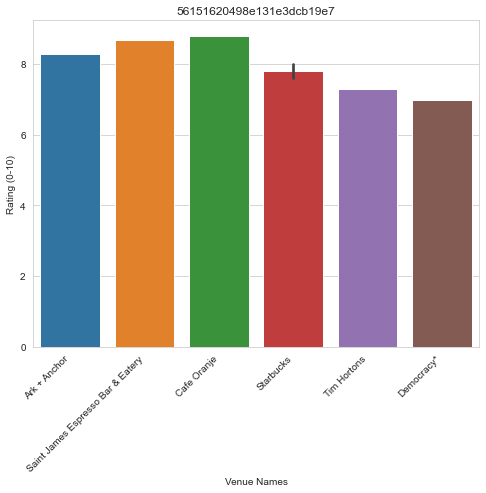

In [125]:
# PLOT TO DISPLAY EACH CATEGORY VALUES
# USING SEABORN AND MATPLOTLIB 
# SEABORM updates MATPLOTLIB's rc paramaters to improve aesthetics
import seaborn as sns
sns.set_style("whitegrid")
# sns.set_context(font_scale=2, rc={"font.size":15, "axes.labelsize":15})
fig, ax = plt.subplots(figsize = (8,6)) 
fig = sns.barplot(x="Venue_name", y="Ratings(0-10)", data=DF_list[0])
plt.xticks(rotation=45,ha="right")

plt.title(DF_list[0].iloc[0,0])
plt.xlabel("Venue Names")
plt.ylabel("Rating (0-10)")
# for i in DF_list:

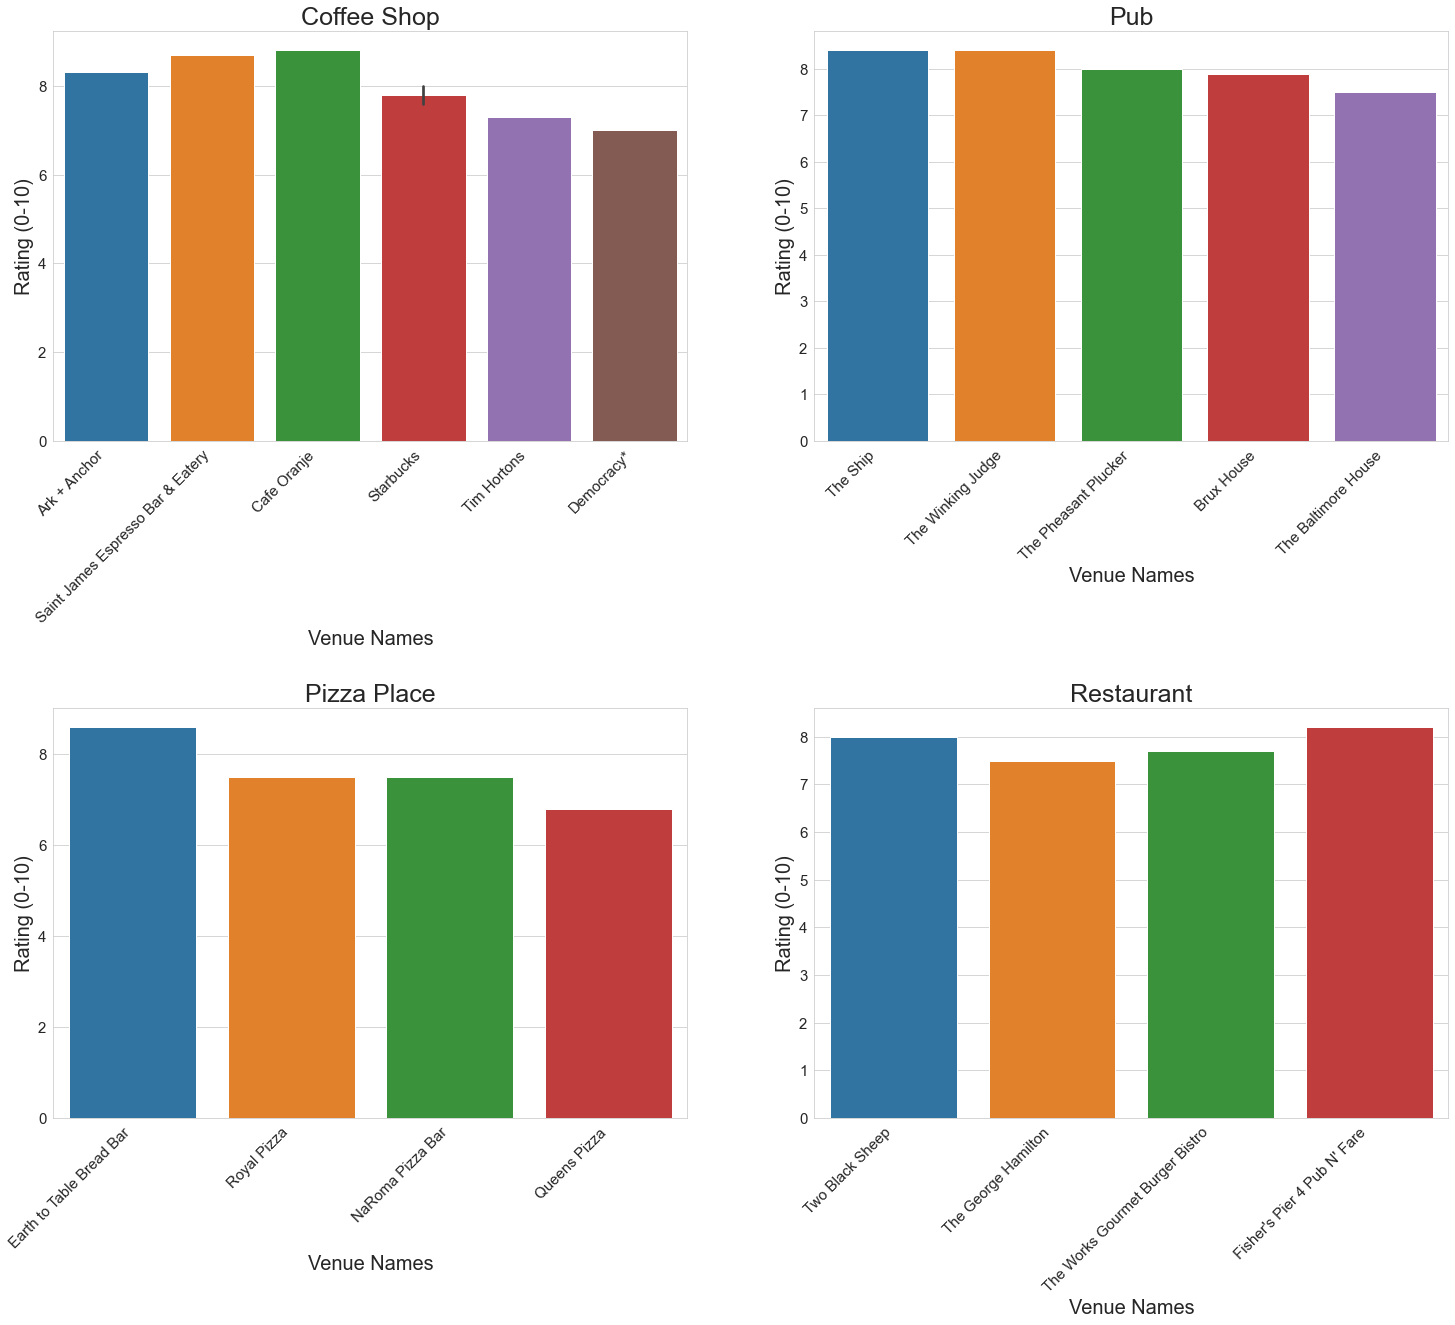

In [126]:
# let's generate multiple subplots for the rest of category BASED ON Ratings
plt.figure(figsize = (25,20))
for i,dataframe in enumerate(DF_list):
    plt.subplot(2,2, i+1) 
    plt.subplots_adjust(hspace=0.65)
    sns.barplot(x="Venue_name", y="Ratings(0-10)", data=dataframe)
    plt.xticks(rotation=45,ha="right", fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(dataframe.iloc[0,2], fontsize=25)
    plt.xlabel("Venue Names", fontsize=20)
    plt.ylabel("Rating (0-10)", fontsize=20)
    

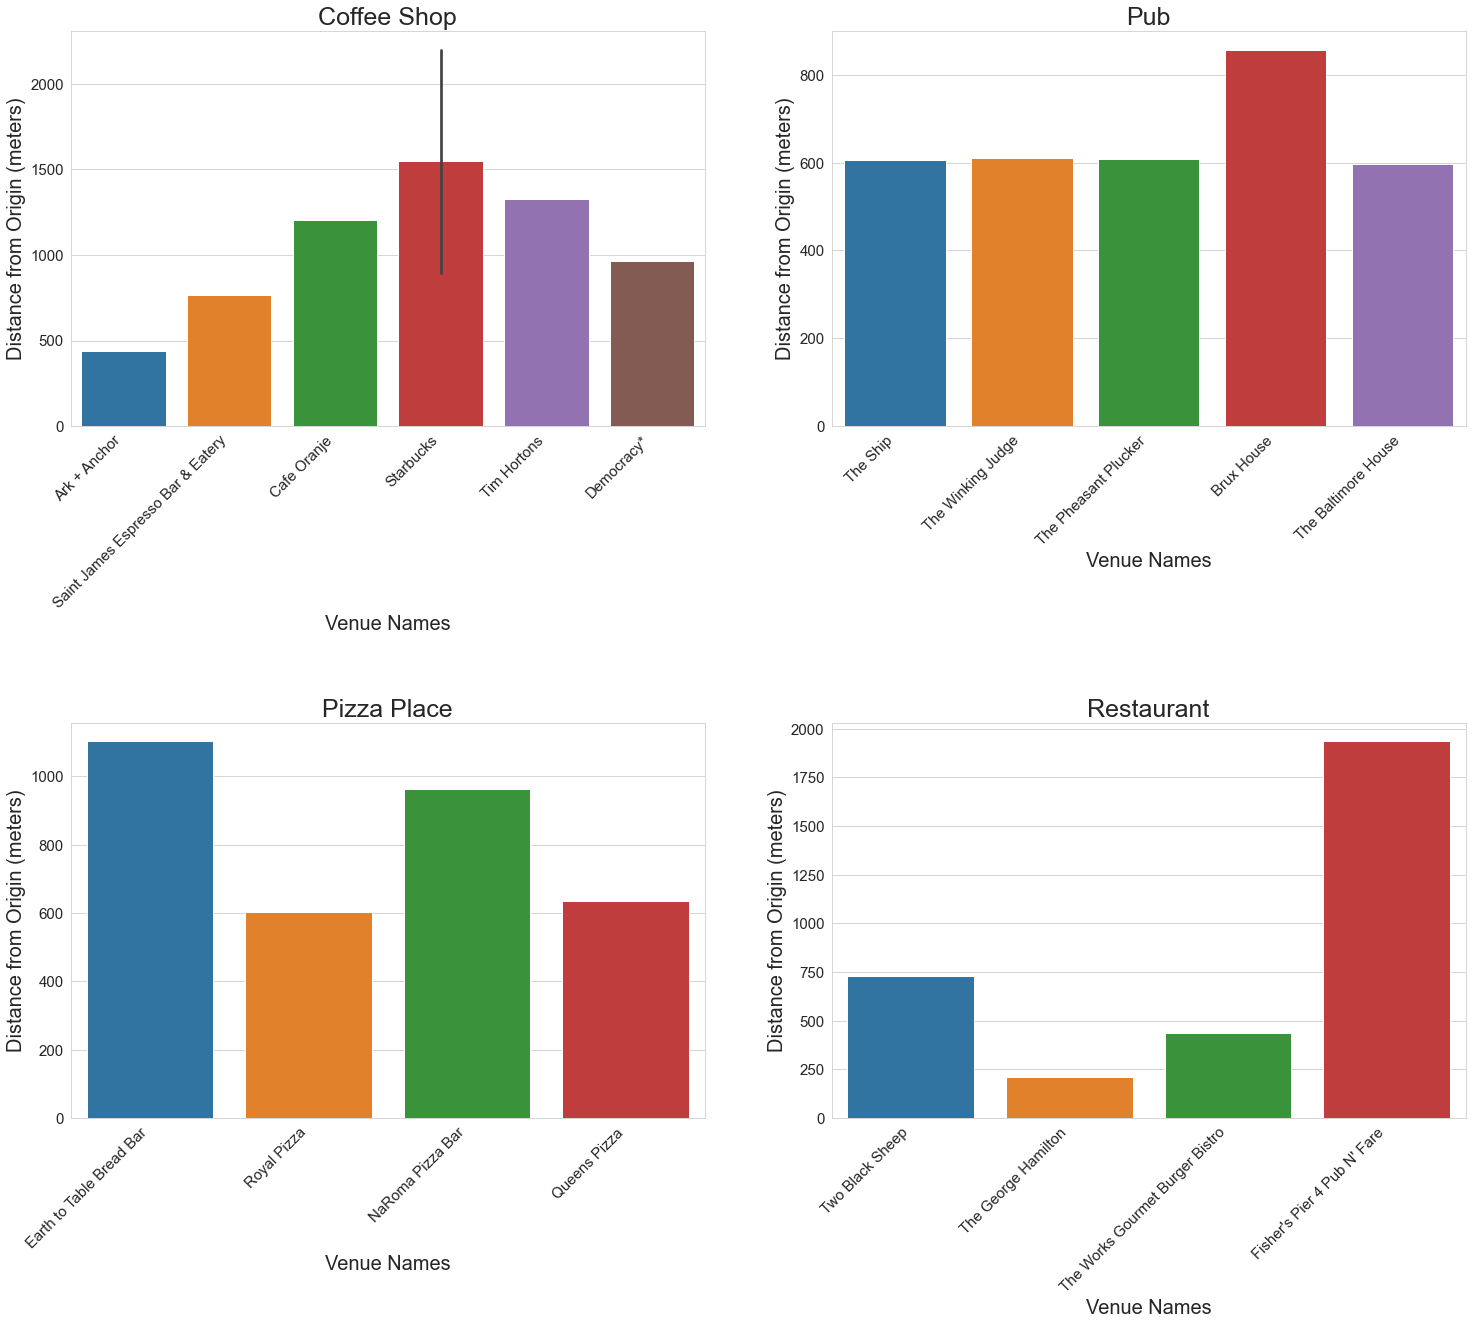

In [127]:
# let's generate multiple subplots for the rest of category BASED ON distance from origin location
plt.figure(figsize = (25,20))
for i,dataframe in enumerate(DF_list):
    plt.subplot(2,2, i+1) 
    plt.subplots_adjust(hspace=0.75)
    sns.barplot(x="Venue_name", y="Dist_from_origin(m)", data=dataframe)
    plt.xticks(rotation=45,ha="right", fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(dataframe.iloc[0,2], fontsize=25)
    plt.xlabel("Venue Names", fontsize=20)
    plt.ylabel("Distance from Origin (meters)", fontsize=20)

#### BATTLE OF NEIGHBORHOOD BY CLUSTERING

In [128]:
# Need to cluster the neighborhood and visualize on may. 
# Then process foe each neighborhood, the best based on reviews and proximity to neighborhood coordinates 

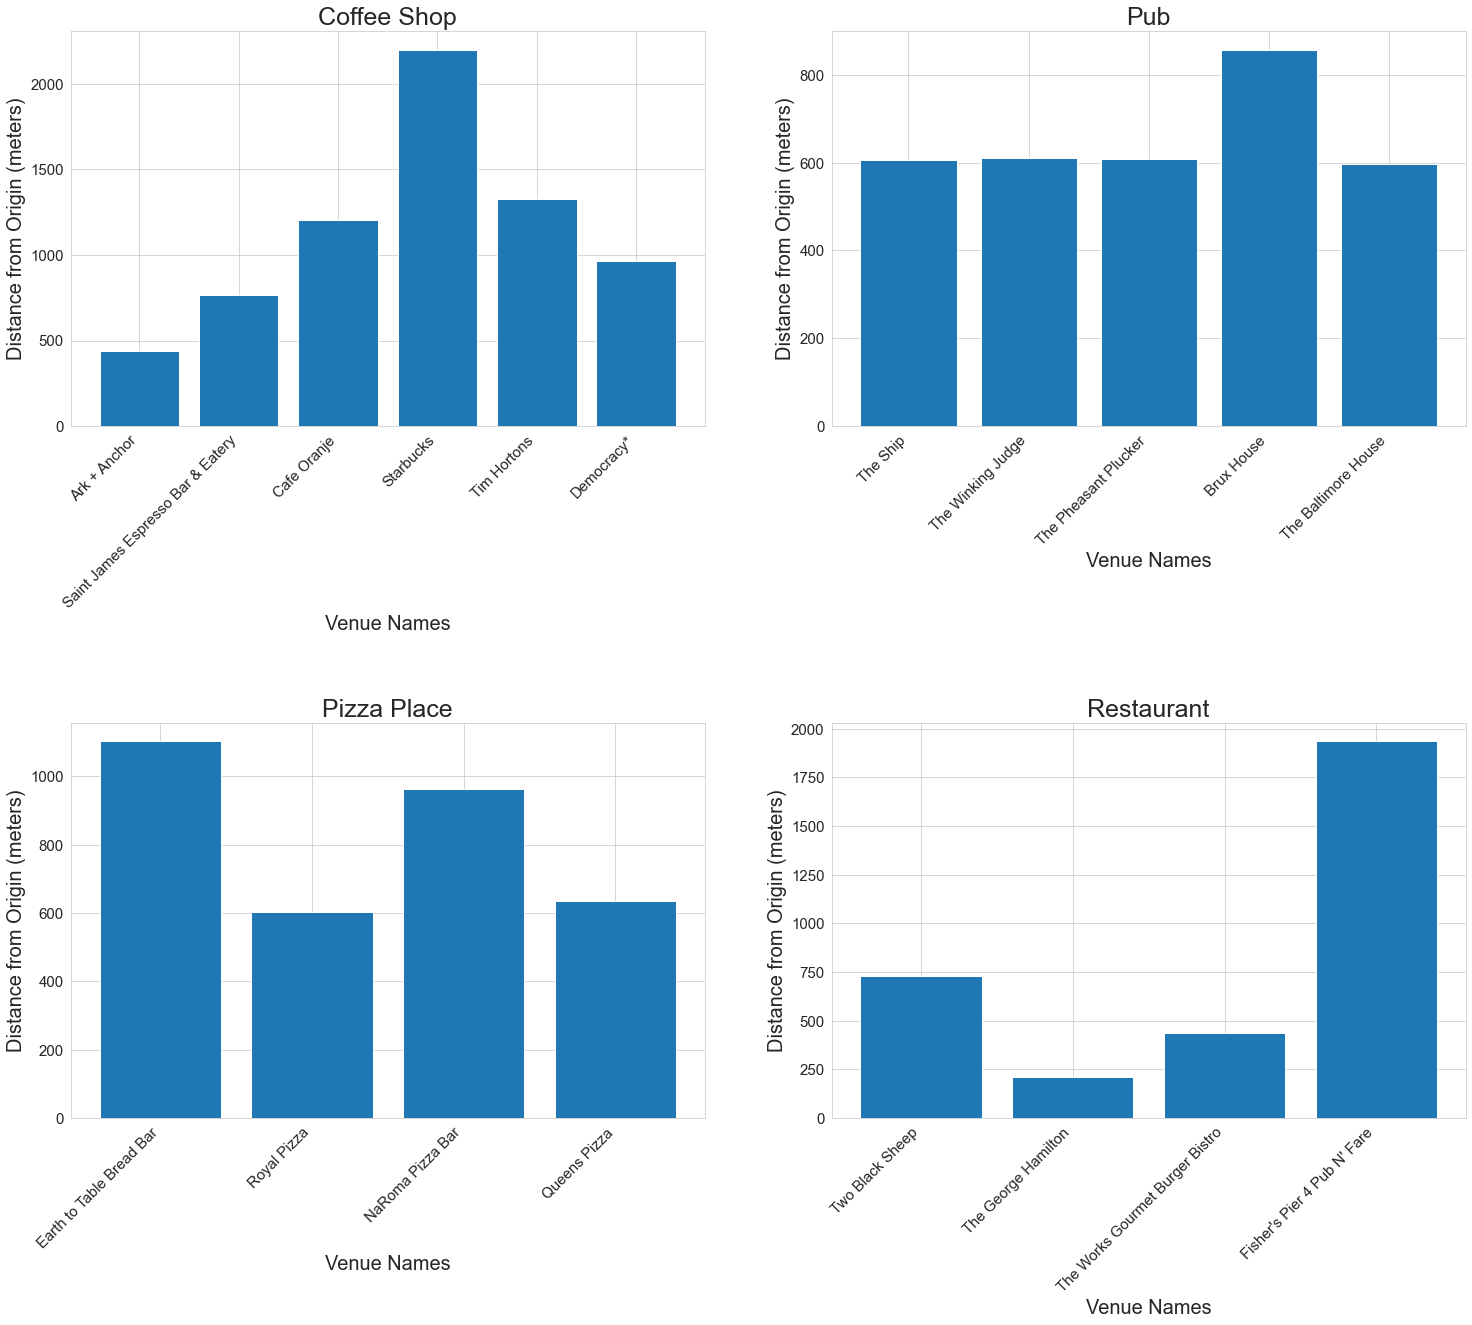

In [164]:
# let's generate multiple subplots for the rest of category BASED ON distance from origin location
#     xpos = np.arange(dataframe.shape[0]) 

# plt.figure(figsize = (25,20))
# for i,dataframe in enumerate(DF_list):   
#     plt.subplot(2,2, i+1) 
#     plt.subplots_adjust(hspace=0.75)
#     xpos = np.arange(dataframe.shape[0])
#     sns.barplot(xpos+15, y="Dist_from_origin(m)", color="green", data=dataframe, label="Distance")
#     sns.barplot(xpos+15, y="Ratings(0-10)", color="blue", data=dataframe, label="Rating")
#     # converting venue_name from series to list 
#     venue_list = dataframe["Venue_name"].tolist() 
#     print(venue_list)
#     plt.xticks(xpos,venue_list,rotation=45,ha="right", fontsize=15)
#     plt.yticks(fontsize=15)
#     plt.title(dataframe.iloc[0,2], fontsize=25)
#     plt.xlabel("Venue Names", fontsize=20)
#     plt.ylabel("Distance from Origin (meters)", fontsize=20)
#     plt.legend()
    
# BEST PLOT SO FAR  
# plt.set_style("whitegrid")
fig = plt.figure(figsize = (25,20))
for i,dataframe in enumerate(DF_list):   
    ax = fig.add_subplot(2,2, i+1) 
    fig.subplots_adjust(hspace=0.75)
    ax.bar(dataframe["Venue_name"], dataframe["Dist_from_origin(m)"])
    ax.set_xticklabels(dataframe["Venue_name"], rotation=45, ha="right", fontsize=15)
    plt.yticks(fontsize=15)
    ax.set_title(dataframe.iloc[0,2], fontsize=25)
    ax.set_xlabel("Venue Names", fontsize=20)
    ax.set_ylabel("Distance from Origin (meters)", fontsize=20)

#### OBSERVATION 

In [166]:
# BETWEEN THESE TWO NEIGHBORHOODS IN TORONTO, Christie AND University of Toronto, Harbord. 
# WHICH IS A BETTER NEIGHBORHOOD FOR BRIAN TO LIVE IN

# coordinate of christie
toronto_neighbourhood

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.7545,-79.3300
1,M4A,North York,Victoria Village,43.7276,-79.3148
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7223,-79.4504
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6641,-79.3889
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.6662,-79.5282
6,M1B,Scarborough,"Malvern, Rouge",43.8113,-79.1930
7,M3B,North York,Don Mills,43.7450,-79.3590
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.7063,-79.3094
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.6572,-79.3783


In [228]:
# Function to perform the analysis based on distance and ratings any given location 
def get_Json_From_Foursquare(lat, long):    
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&ll={},{}&v={}&raius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET,  
        lat, 
        long, 
        VERSION,
        RADIUS, 
        LIMIT
    )
    json_data = requests.get(url).json()
    return json_data

In [211]:
# extracts data from json format
def get_Data_From_Json(json_result):
    response = []
    for venue in json_result['response']['groups'][0]['items']:
        row = []
        row.append(venue['venue']['id'])
        row.append(venue['venue']['name']) #get's the name of the venue
        row.append(venue['venue']['categories'][0]['name']) # gets the category name of the venue
        row.append(venue['venue']['location']['lat']) #gets the lat of the venue
        row.append(venue['venue']['location']['lng']) #gets the lng of the venue
        response.append(row)
    
    return response

In [212]:
# gets the rating of a venue
def get_Ratings(id):
    venue_URL = "https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}".format(
    id, CLIENT_ID, CLIENT_SECRET, VERSION)
    venue_json = requests.get(venue_URL).json()
    rating = venue_json['response']['venue']['rating']
    
    return rating

In [213]:
# function to calculate distance between to long and lat coordinates in METERS
def get_Distance_Between(origin, destination):
    distance = great_circle(origin, destination).m
    return distance

In [280]:
# LET'S MAKE THE NEW DATAFRAME FOR THE VENUES RETURNED
# Populate the dataframe based on a location data usilatitude and longitude
def location_Based_Dataframe(json_data, origin):
    
    # make a new dataframe with the following column names
    column_names = ["ID", "Venue_name", "Category", "Latitude", "Longitude"]
    data = get_Data_From_Json(json_data) #should contain the data from foursquare
    df = pd.DataFrame(data, columns=column_names)
    
    # filter out the dataframe needed based on specific categories
    # needed_categories = ["Pub", "Restaurant", "Pizza Place", "Coffee Shop"]  # the requirements of a user.. might change later to be dynamic
    needed_categories = ["Restaurant", "Gym"]
    df_needed = df[df['Category'].isin(needed_categories)]
    df_needed.reset_index(drop=True, inplace=True)
    
    
    Ratings = []
    Dist_from_origin = []

    # grabs the first id in the dataframe Oth row and 0th column
    # id = df_needs.iloc[0,0]

    # loop length based on number od IDs returned
    total_ID = df_needed["ID"].count()
    for i in range(total_ID):
        id = df_needed.iloc[i,0]
        rating = get_Ratings(id)

        dest_lat = df_needed.iloc[i,3]
        dest_long = df_needed.iloc[i,4]
        destination = (dest_lat, dest_long)
        distance = get_Distance_Between(origin, destination)

        Ratings.append(rating)
        Dist_from_origin.append(distance)
        
    # append the list of distances and ratings into the df_needs dataframe
    df_needed["Dist_from_origin(m)"] = Dist_from_origin
    df_needed["Ratings(0-10)"] = Ratings
#     Same functionality as above
#     df_needed.loc[:,"Dist_from_origin(m)"] = Dist_from_origin
#     df_needed.loc[:,"Ratings(0-10)"] = Ratings
    
    return df_needed

In [316]:
def plot_Dataframes_Distances(dataframe_list):
    fig = plt.figure(figsize = (20,20))
    for i,dataframe in enumerate(dataframe_list):   
        ax = fig.add_subplot(2,2, i+1) 
        fig.subplots_adjust(hspace=0.75)
        ax.bar(dataframe["Venue_name"], dataframe["Dist_from_origin(m)"], color="red")
        ax.set_xticklabels(dataframe["Venue_name"], rotation=45, ha="right", fontsize=15)
        plt.yticks(fontsize=15)
        ax.set_title(dataframe.iloc[0,2], fontsize=25)
        ax.set_xlabel("Venue Names", fontsize=20)
        ax.set_ylabel("Distance from Origin (meters)", fontsize=20)
        
def plot_Dataframes_Ratings(dataframe_list):
    fig = plt.figure(figsize = (20,20))
    for i,dataframe in enumerate(dataframe_list):   
        ax = fig.add_subplot(2,2, i+1) 
        fig.subplots_adjust(hspace=0.75)
        ax.bar(dataframe["Venue_name"], dataframe["Ratings(0-10)"], color="green")
        ax.set_xticklabels(dataframe["Venue_name"], rotation=45, ha="right", fontsize=15)
        plt.yticks(fontsize=15)
        ax.set_title(dataframe.iloc[0,2], fontsize=25)
        ax.set_xlabel("Venue Names", fontsize=20)
        ax.set_ylabel("Ratings(0-10)", fontsize=20)

In [308]:
# Christie long and lat 
christie_lat = toronto_neighbourhood[toronto_neighbourhood["Neighbourhood"] == "Don Mills"].iloc[0,3]
christie_lng = toronto_neighbourhood[toronto_neighbourhood["Neighbourhood"] == "Don Mills"].iloc[0,4]

# University of Toronto, Harbord long and lat
uoft_lat = toronto_neighbourhood[toronto_neighbourhood["Neighbourhood"] == "Richmond, Adelaide, King"].iloc[0,3]
uoft_lng = toronto_neighbourhood[toronto_neighbourhood["Neighbourhood"] == "Richmond, Adelaide, King"].iloc[0,4]

origin1 = (christie_lat, christie_lng) # FIRST LOCATION
origin2 = (uoft_lat, uoft_lng) # SECOND LOCATION

VERSION = '20180605' # Foursquare API version
RADIUS = 100000 #100 KILOMETER
LIMIT = 200 # A default Foursquare API limit value    
CLIENT_ID = "0XWSDC41M43K0A0JO2WJJV43MBU4XVWN0QEEKQ2CG4YJM1HX"
CLIENT_SECRET = "S3FVFZMISIEFNN2MVXE5GLPBQPOL5DJRJZQD4UDDHV544FSP"

#### "Christie" NEIGHBORHOOD ANALYSIS

In [302]:
# unique_index = df_needs.index.unique()
raw_data1 = get_Json_From_Foursquare(christie_lat, christie_lng)
df_final_1 = location_Based_Dataframe(raw_data1, origin1)
unique_category = df_final_1['Category'].unique()

<ipython-input-280-f2c32764ceca>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_needed["Dist_from_origin(m)"] = Dist_from_origin
<ipython-input-280-f2c32764ceca>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_needed["Ratings(0-10)"] = Ratings


In [303]:
# Alternative method to above DF_list
DFS1 = [df_final_1[df_final_1['Category'] == i] for i in unique_category]

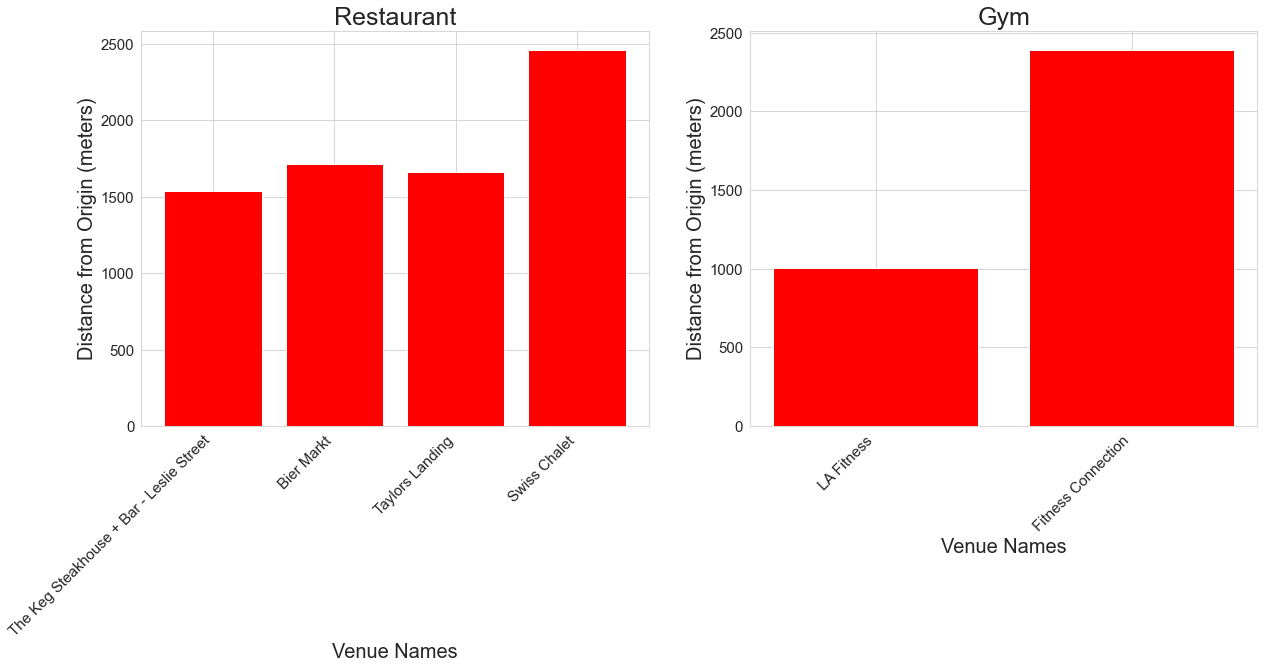

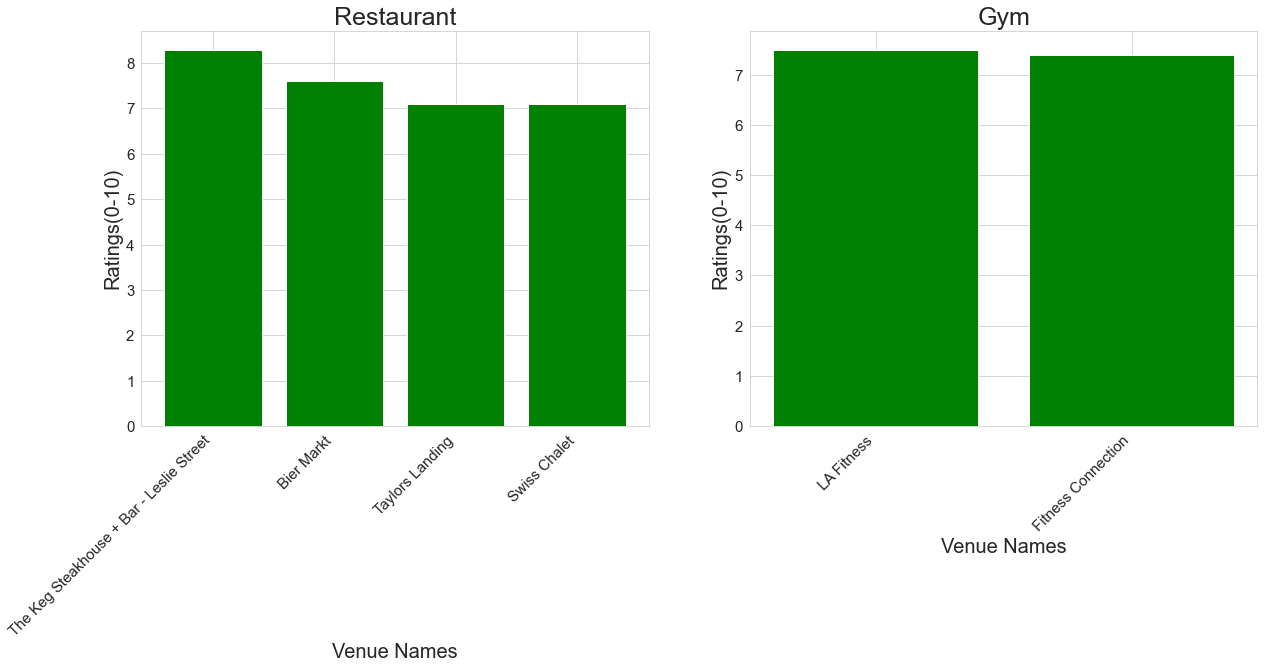

In [317]:
plot_Dataframes_Distances(DFS1)
plot_Dataframes_Ratings(DFS1)

#### "Richmond, Adelaide, King" NEIGHBORHOOD ANALYSIS

In [305]:
# Richmond, Adelaide, King	43.6496	-79.3833
raw_data2 = get_Json_From_Foursquare(43.6496, -79.3833)
df_final_2 = location_Based_Dataframe(raw_data2, (43.6496, -79.3833))
unique_category = df_final_2['Category'].unique()

<ipython-input-280-f2c32764ceca>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_needed["Dist_from_origin(m)"] = Dist_from_origin
<ipython-input-280-f2c32764ceca>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_needed["Ratings(0-10)"] = Ratings


In [306]:
# Alternative method to above DF_list
DFS2 = [df_final_2[df_final_2['Category'] == i] for i in unique_category]

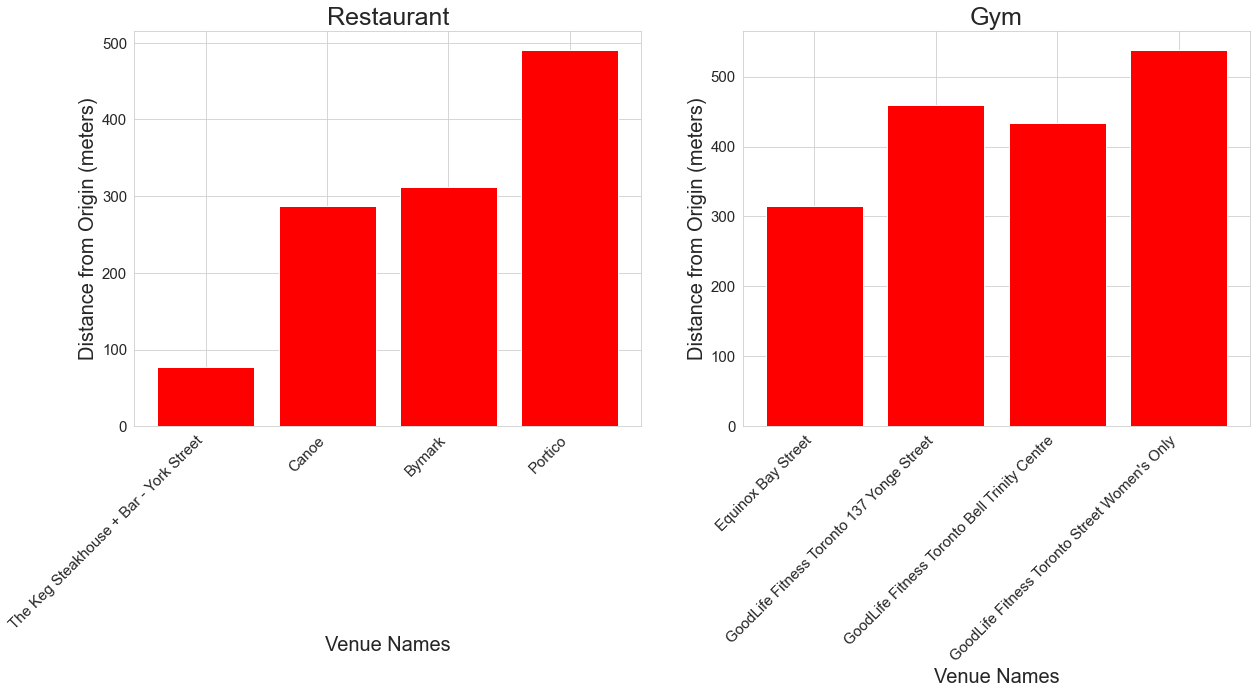

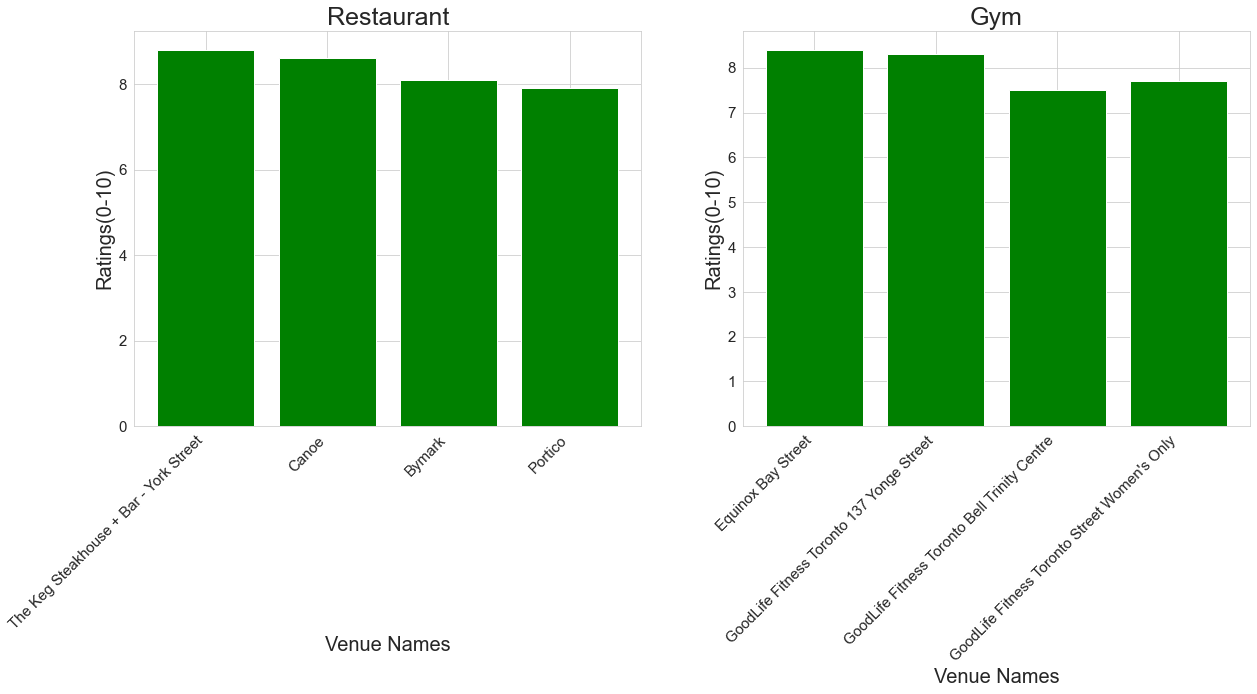

In [318]:
plot_Dataframes_Distances(DFS2)
plt.savefig("DistancesFromOrigin.png", bbox_inches="tight")
plot_Dataframes_Ratings(DFS2)
plt.savefig("Ratings.png", bbox_inches="tight")